In [75]:
# Strongly inspired by https://en.wikipedia.org/wiki/Trigonometric_interpolation#Implementation
import numpy as np
import matplotlib.pyplot as plt
import math

In [88]:
points = {(-2,0), (1,2),(3,5),(4,-7),(6,3)}

x = np.array([x for x,y in points])
y = np.array([y for x,y in points])

u,c = np.unique(x, return_counts=True)
assert len(u[c>1]) == 0 # Ensure no duplicate x value is used (otherwise there is no function)

def t(k, x, xlist):
  product = 1
  for m in range(len(xlist)):
    if m == k:
      continue
    product *= math.sin(1/2*(x-xlist[m]))/math.sin(1/2*(xlist[k]-xlist[m]))
  return product
  
def p(curr_x, x, y):
  temp_sum = 0
  for k in range(x.size):
    temp_sum += y[k] * t(k, curr_x, x)
  return temp_sum

In [89]:
plot_space = np.linspace(min(x)-5,max(x)+5, 400)
mapped_fun_points = np.array(list(map(lambda x_val: p(x_val,x,y), plot_space)))

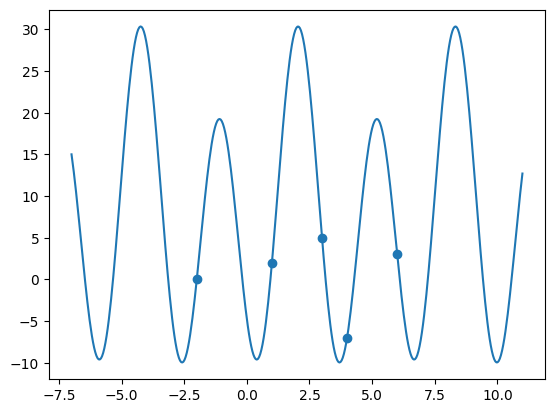

In [90]:
plt.scatter(x,y)
plt.plot(plot_space, mapped_fun_points)